# Challenge Técnico (Core)

**Objetivo**
Los estudiantes deberán participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

**Descripción del Dataset:** 

El conjunto de datos para esta competencia (tanto de entrenamiento como de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos Abalone . Las distribuciones de características son similares a las originales, pero no exactamente iguales. No dude en utilizar el conjunto de datos original como parte de esta competencia, tanto para explorar las diferencias como para ver si la incorporación del original en el entrenamiento mejora el rendimiento del modelo.

Archivos
train.csv - el conjunto de datos de entrenamiento; Rings es la target pues la edad es 1.5 por Ring

test.csv : el conjunto de datos de prueba; su objetivo es predecir el valor de Ringscada fila

sample_submission.csv : un archivo de envío de muestra en el formato correcto

# Paso 1: Cargar y Preprocesar los Datos

Cargaremos y preprocesaremos el dataset Abalone Dataset como en los ejemplos anteriores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../../data/kaggle/competencia/abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   Wholeweight    4177 non-null   float64
 5   Shuckedweight  4177 non-null   float64
 6   Visceraweight  4177 non-null   float64
 7   Shellweight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

No hay valores duplicados.

In [6]:
# Verificar si hay valores nulos
df.isnull().sum()


Sex              0
Length           0
Diameter         0
Height           0
Wholeweight      0
Shuckedweight    0
Visceraweight    0
Shellweight      0
Rings            0
dtype: int64

Confirmamos que no hay nulos

In [7]:
valores_categoricos = df.select_dtypes(include = 'object')

In [8]:
valores_categoricos.value_counts()

Sex
M      1528
I      1342
F      1307
Name: count, dtype: int64

El sexo tiene 3 valores, M, F e I (infante)

Identificación de Outliers

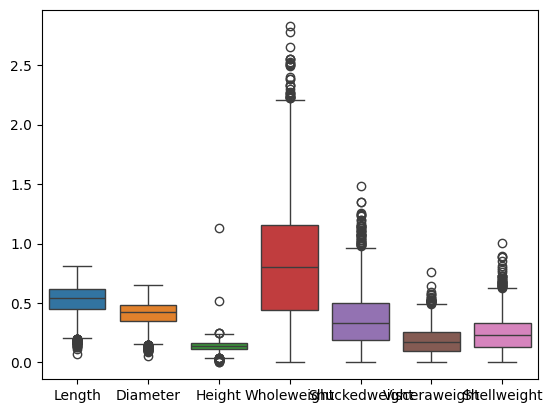

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['Length', 'Diameter', 'Height', 'Wholeweight', 'Shuckedweight', 'Visceraweight', 'Shellweight']])
plt.show()


Z-Score: Se puede usar para identificar valores que se desvían significativamente de la media.

In [10]:
from scipy.stats import zscore

# Calcular el z-score para las variables numéricas
z_scores = zscore(df[['Length', 'Diameter', 'Height', 'Wholeweight', 'Shuckedweight', 'Visceraweight', 'Shellweight']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Mostrar las filas con outliers
df[outliers]


,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Rings


Estadísticas Descriptivas Básicas

In [11]:
# Estadísticas descriptivas básicas
df.describe()

,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
# Estadísticas descriptivas para la columna categórica 'Sex'
df['Sex'].value_counts()


Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

**Visualizaciones de Distribución de Variables**

**Distribución de las características numéricas:** Usamos histogramas para visualizar la distribución de cada una de las variables numéricas.

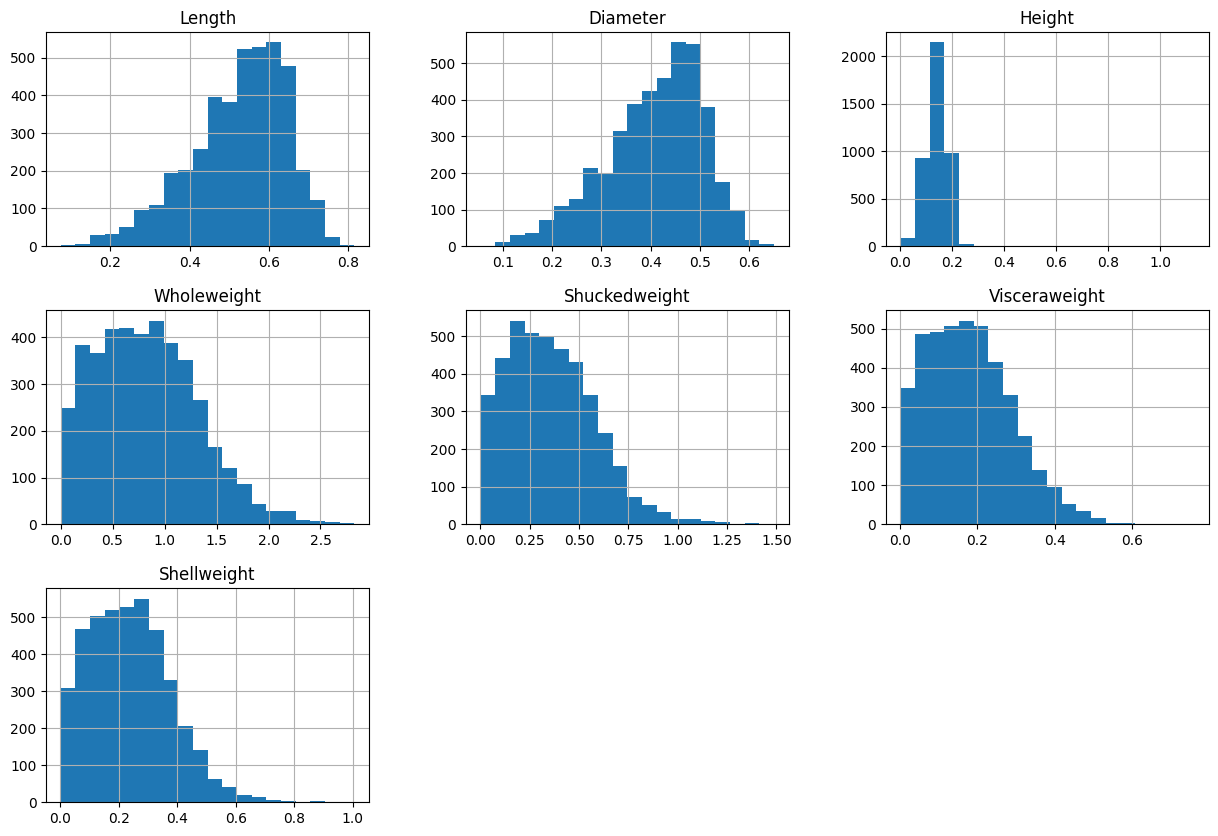

In [13]:
# Visualización de la distribución de variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

df[['Length', 'Diameter', 'Height', 'Wholeweight', 'Shuckedweight', 'Visceraweight', 'Shellweight']].hist(bins=20, figsize=(15, 10))
plt.show()


Boxplots para detectar outliers en las variables numéricas:

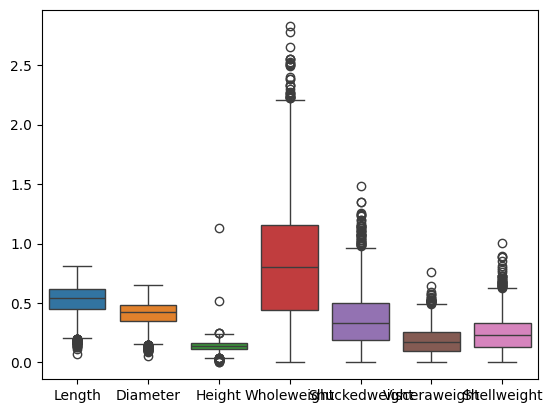

In [14]:
# Boxplot para detectar outliers
sns.boxplot(data=df[['Length', 'Diameter', 'Height', 'Wholeweight', 'Shuckedweight', 'Visceraweight', 'Shellweight']])
plt.show()


Distribución de la variable categórica:

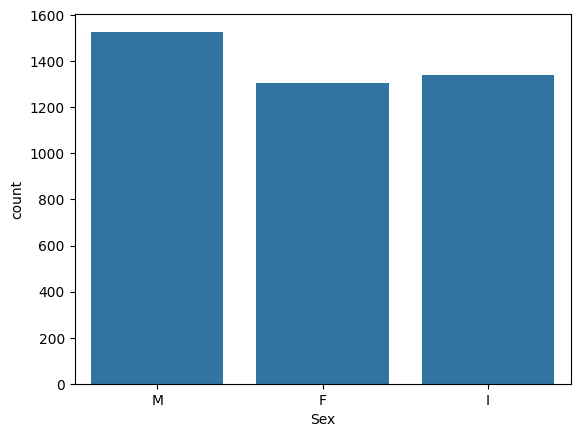

In [15]:
# Distribución de la variable categórica 'Sex'
sns.countplot(x='Sex', data=df)
plt.show()


Relaciones entre Variables
Para entender cómo se relacionan las variables entre sí, creamos:

Mapas de calor de la matriz de correlación: Esto nos ayudará a visualizar las relaciones lineales entre las variables numéricas.

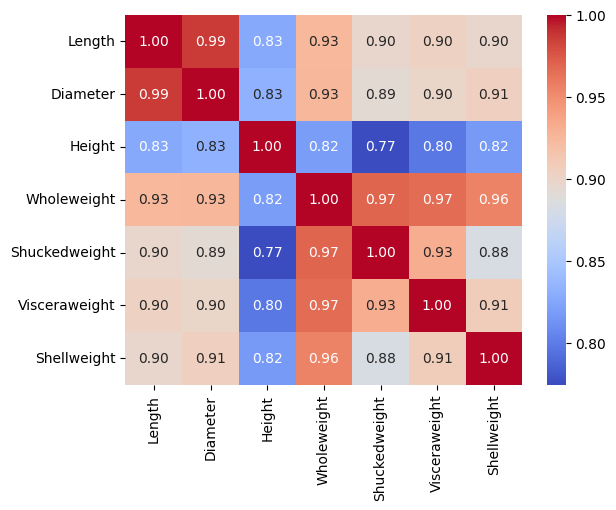

In [16]:
# Correlación entre variables numéricas
corr_matrix = df[['Length', 'Diameter', 'Height', 'Wholeweight', 'Shuckedweight', 'Visceraweight', 'Shellweight']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


Codificación de variables categóricas

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Crear el codificador OneHot para la columna 'Sex'
preprocessor = ColumnTransformer(
    transformers=[
        ('sex', OneHotEncoder(), ['Sex'])
    ],
    remainder='passthrough'  # Mantener las otras columnas sin cambios
)

# Aplicar One-Hot Encoding
df_encoded = preprocessor.fit_transform(df)


Escalado de características numéricas

In [18]:
from sklearn.preprocessing import StandardScaler

# Características numéricas a escalar
numerical_features = ['Length', 'Diameter', 'Height', 'Wholeweight', 'Shuckedweight', 'Visceraweight', 'Shellweight']

# Crear el escalador
scaler = StandardScaler()

# Aplicar el escalado
df[numerical_features] = scaler.fit_transform(df[numerical_features])


División en conjuntos de entrenamiento y prueba

Entrenar y evaluar cinco modelos diferentes:

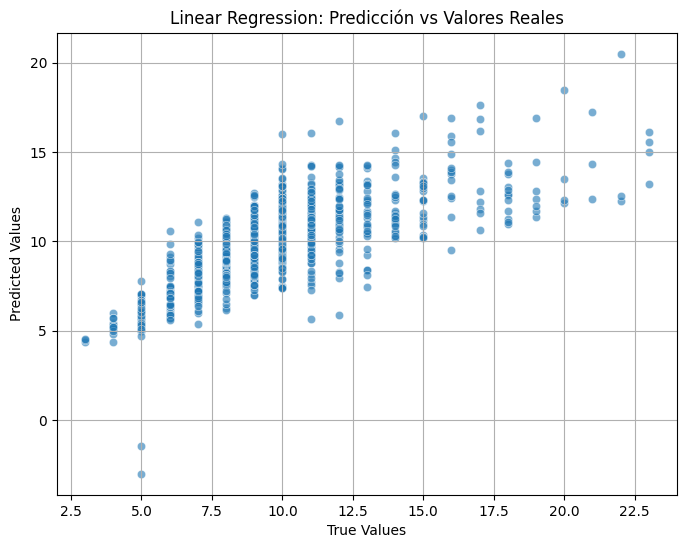

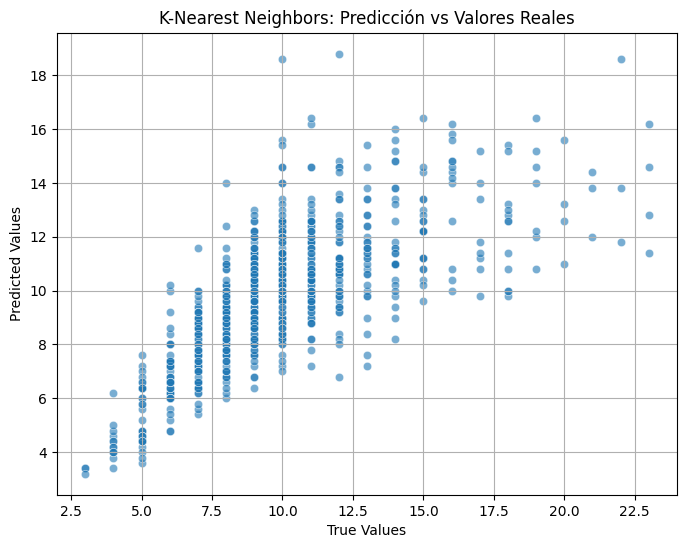

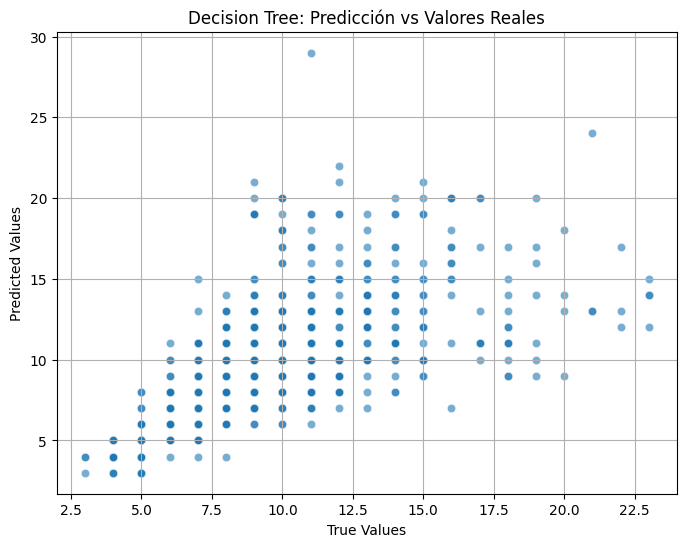

c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:56:54] WARNING: D:\bld\xgboost-split_1730232592996\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


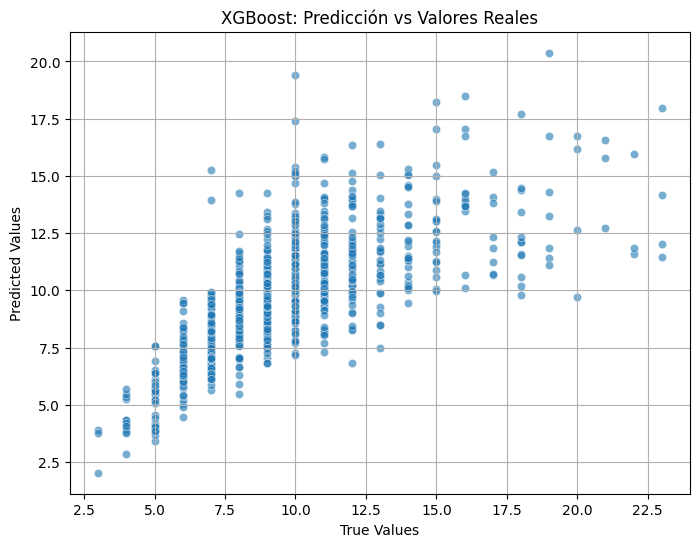

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 9
[LightGBM] [Info] Start training from score 9.944627


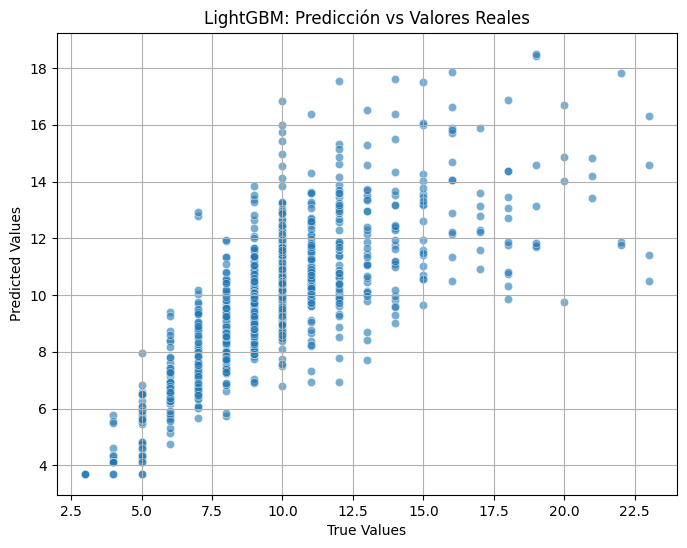

                 Model       MSE       MAE  R2 Score
0    Linear Regression  4.891232  1.593107  0.548163
1  K-Nearest Neighbors  5.233254  1.607895  0.516568
2        Decision Tree  9.215311  2.064593  0.148718
3              XGBoost  5.437236  1.641550  0.497725
4             LightGBM  5.060295  1.563354  0.532545

# Resumen del Benchmark

El mejor modelo fue: **Linear Regression**.

- **MSE:** 4.89
- **MAE:** 1.59
- **R2 Score:** 0.55

El rendimiento más destacado se basó en el **R2 Score**, indicando la proporción de varianza explicada por el modelo.



In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir características (X) y target (y)
X = df.drop("Rings", axis=1)
y = df["Rings"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar columnas categóricas y numéricas
categorical_columns = ['Sex']
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

# Escalar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Codificar características categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Combinar las características escaladas y codificadas
X_train_processed = np.hstack((X_train_scaled, X_train_encoded))
X_test_processed = np.hstack((X_test_scaled, X_test_encoded))

# Nombres de las columnas finales
numerical_feature_names = numerical_columns
categorical_feature_names = encoder.get_feature_names_out(categorical_columns)
final_feature_names = numerical_feature_names + list(categorical_feature_names)

# Convertir a DataFrame para mayor claridad
X_train_processed_df = pd.DataFrame(X_train_processed, columns=final_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=final_feature_names)

# Definir modelos
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', use_label_encoder=False),
    "LightGBM": LGBMRegressor(objective='regression')
}

# Evaluar modelos
results = []

for name, model in models.items():
    # Entrenar modelo
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score": r2
    })
    
    # Graficar si es necesario
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name}: Predicción vs Valores Reales")
    plt.grid()
    plt.show()

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)

# Mostrar resultados
print(results_df)

# Markdown resumen
best_model = results_df.sort_values(by="R2 Score", ascending=False).iloc[0]
print(f"""
# Resumen del Benchmark

El mejor modelo fue: **{best_model['Model']}**.

- **MSE:** {best_model['MSE']:.2f}
- **MAE:** {best_model['MAE']:.2f}
- **R2 Score:** {best_model['R2 Score']:.2f}

El rendimiento más destacado se basó en el **R2 Score**, indicando la proporción de varianza explicada por el modelo.
""")


Optimizing Linear Regression...


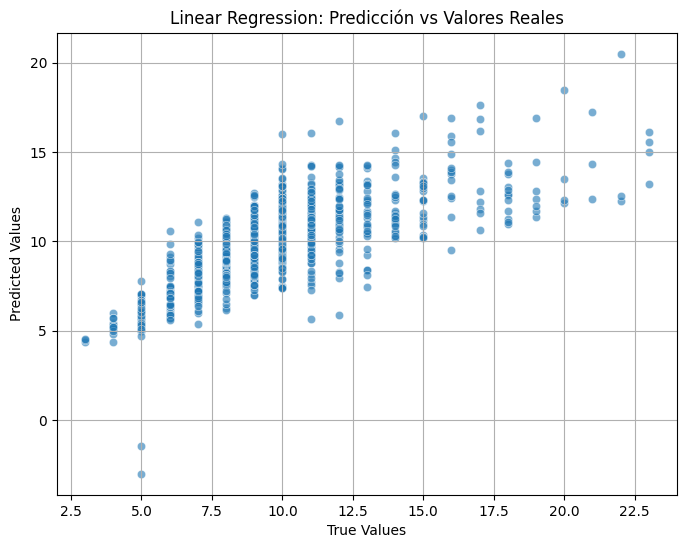

Optimizing KNN...


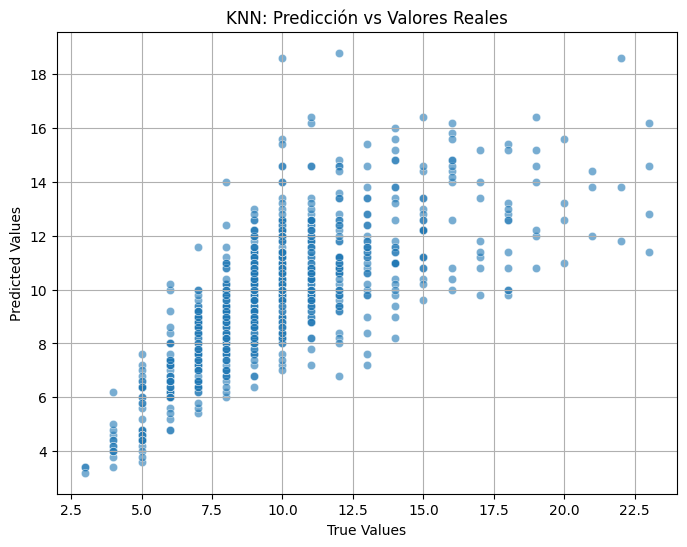

Optimizing Decision Tree...


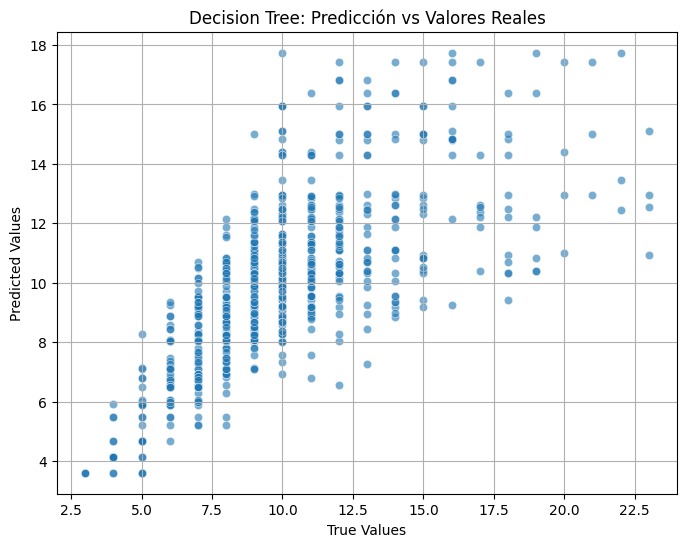

Optimizing Random Forest...


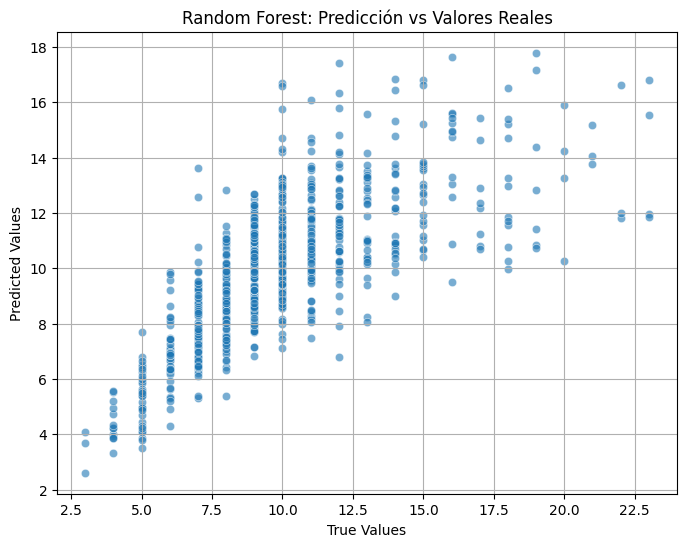

Optimizing XGBoost...


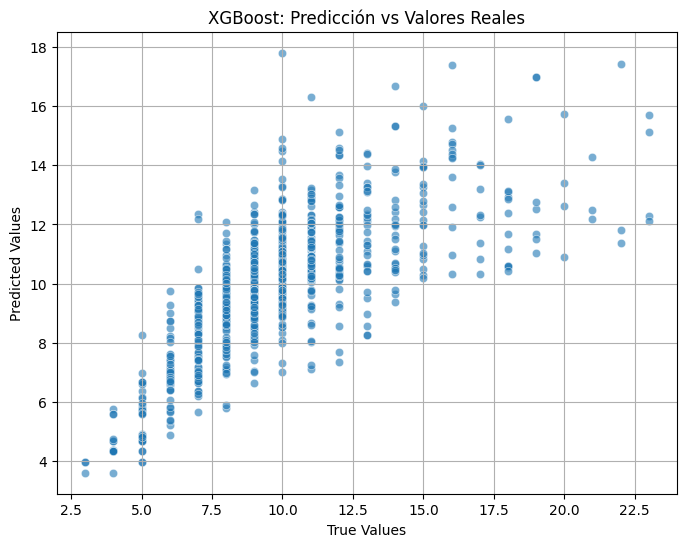

Optimizing LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 2672, number of used features: 9
[LightGBM] [Info] Start training from score 10.016467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

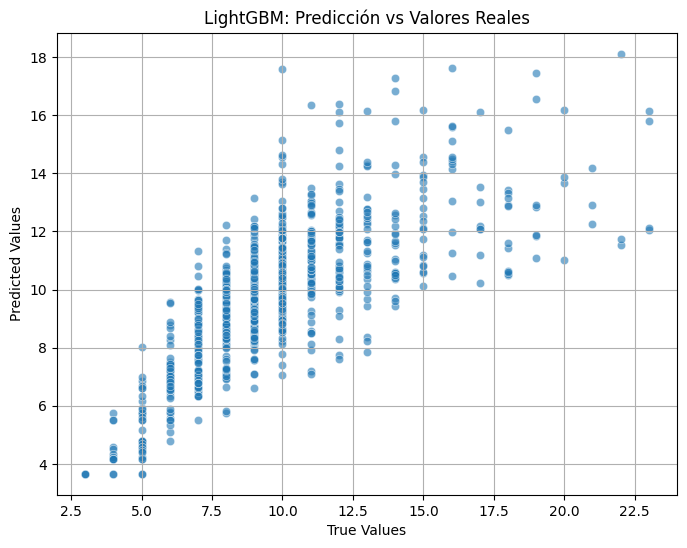

               Model       MSE       MAE  R2 Score  \
0  Linear Regression  4.891232  1.593107  0.548163   
1                KNN  5.233254  1.607895  0.516568   
2      Decision Tree  5.492805  1.646764  0.492591   
3      Random Forest  5.013073  1.578720  0.536908   
4            XGBoost  4.996933  1.550126  0.538399   
5           LightGBM  4.950798  1.559402  0.542660   

                                     Best Parameters  
0                                               None  
1                                               None  
2  {'min_samples_split': 18, 'min_samples_leaf': ...  
3                                               None  
4  {'subsample': 0.9, 'n_estimators': 500, 'max_d...  
5  {'num_leaves': 20, 'n_estimators': 100, 'max_d...  

# Resumen del Benchmark

El mejor modelo fue: **Linear Regression**.

- **MSE:** 4.89
- **MAE:** 1.59
- **R2 Score:** 0.55

**Mejores parámetros:** None

El rendimiento más destacado se basó en el **R2 Score**, indicando la proporción 

In [24]:
from sklearn.model_selection import RandomizedSearchCV

# Definir parámetros de búsqueda para cada modelo
param_grid = {
    "K-Nearest Neighbors": {
        'n_neighbors': np.arange(1, 21),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    "Decision Tree": {
        'max_depth': np.arange(3, 20),
        'min_samples_split': np.arange(2, 20),
        'min_samples_leaf': np.arange(1, 20)
    },
    "XGBoost": {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [50, 100, 200, 500],
        'max_depth': np.arange(3, 10),
        'subsample': [0.7, 0.8, 0.9, 1.0]
    },
    "LightGBM": {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [50, 100, 200, 500],
        'max_depth': np.arange(3, 10),
        'num_leaves': [10, 20, 30, 40]
    }
}

# Evaluar modelos con RandomizedSearchCV
results = []

for name, model in models.items():
    print(f"Optimizing {name}...")
    
    # Realizar RandomizedSearchCV para cada modelo
    if name in param_grid:
        search = RandomizedSearchCV(model, param_grid[name], n_iter=10, cv=5, random_state=42)
        search.fit(X_train_processed, y_train)
        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test_processed)
    else:
        model.fit(X_train_processed, y_train)
        y_pred = model.predict(X_test_processed)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Guardar resultados
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score": r2,
        "Best Parameters": search.best_params_ if name in param_grid else None
    })
    
    # Graficar Predicción vs Valores Reales
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name}: Predicción vs Valores Reales")
    plt.grid()
    plt.show()

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)

# Mostrar resultados
print(results_df)

# Markdown resumen
best_model = results_df.sort_values(by="R2 Score", ascending=False).iloc[0]
print(f"""
# Resumen del Benchmark

El mejor modelo fue: **{best_model['Model']}**.

- **MSE:** {best_model['MSE']:.2f}
- **MAE:** {best_model['MAE']:.2f}
- **R2 Score:** {best_model['R2 Score']:.2f}

**Mejores parámetros:** {best_model['Best Parameters']}

El rendimiento más destacado se basó en el **R2 Score**, indicando la proporción de varianza explicada por el modelo.
""")
